# Homework 4

In [8]:
import pandas as pd
import numpy as np
from tqdm import tqdm 
import seaborn as sns
import matplotlib.pyplot as plt

##  Problem 1

In [6]:
fiscal_data=pd.read_csv('Sdf16_1a.txt',sep='\t',header=0,low_memory=False)
budget_reduction_table=pd.read_pickle('budget_reduction_table.pickle')
districts_impacted=budget_reduction_table.LEAID.tolist()
district_data=fiscal_data[['STABBR','LEAID','TOTALEXP','TOTALREV','V33']].reset_index()
district_data['diff']=district_data['TOTALREV']-district_data['TOTALEXP']
district_data['diffstudent']=district_data['diff']/district_data['V33']
impacted_districts=district_data[district_data.LEAID.isin(districts_impacted)]
impacted_districts=impacted_districts.dropna()
impacted_districts['removed']=budget_reduction_table['AMOUNT reduced']
impacted_districts=impacted_districts.dropna()
impacted_districts['proportion reduced']=impacted_districts.removed/impacted_districts.TOTALREV

impacted_districts.LEAID=impacted_districts.LEAID.astype(str)

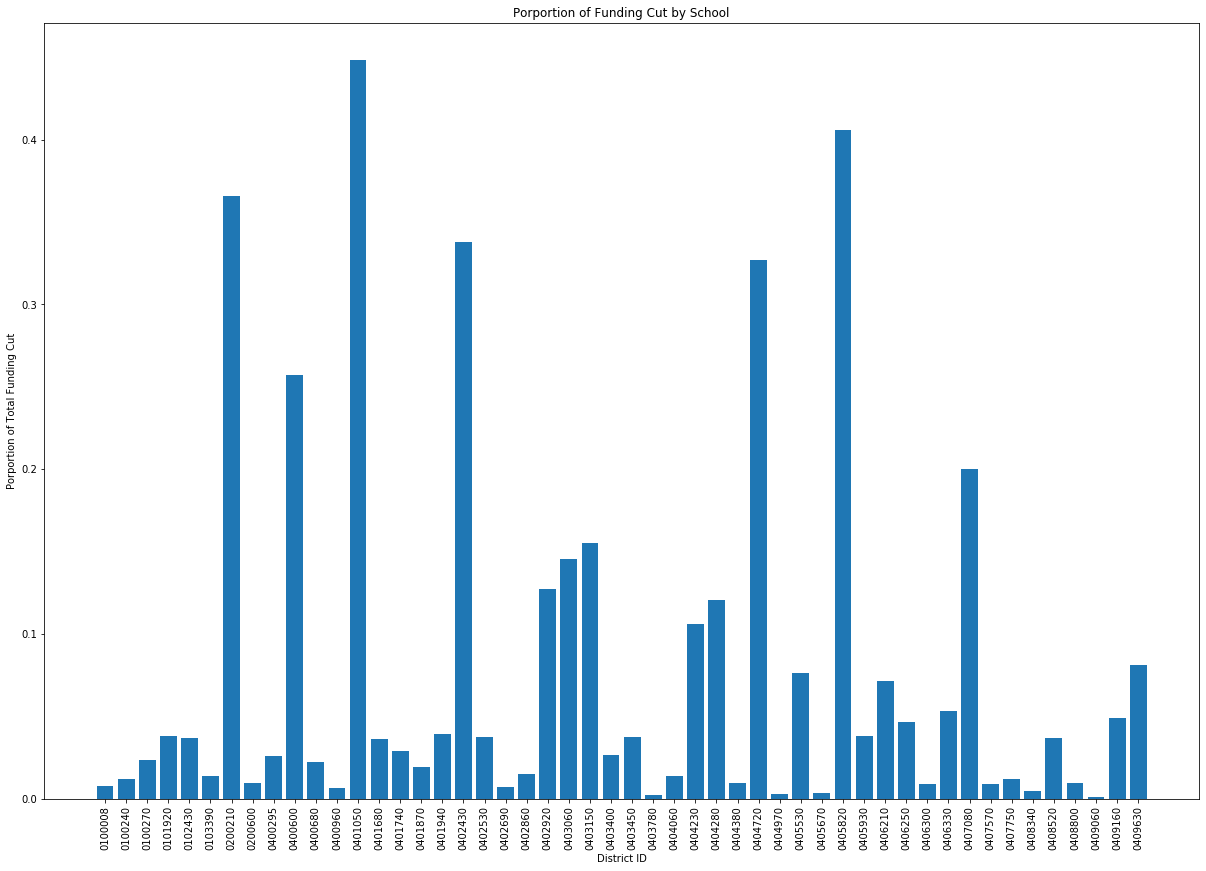

In [88]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 20.7,14.27
plt.bar(impacted_districts.LEAID, impacted_districts['proportion reduced'])
plt.ylabel('Porportion of Total Funding Cut')
plt.title('Porportion of Funding Cut by School')
plt.xlabel('District ID')
plt.xticks(rotation=90)
plt.savefig('HW4_Problem1.png')
plt.show()




# Problem 2

In [154]:
demo=pd.read_csv('ccd_lea_052_1516_w_1a_011717.csv',low_memory=False)

In [155]:
demo['pam']=demo['AM']/demo['TOTAL']
demo['pas']=demo['AS']/demo['TOTAL']
demo['phi']=demo['HI']/demo['TOTAL']
demo['pbl']=demo['BL']/demo['TOTAL']
demo['php']=demo['HP']/demo['TOTAL']
demo['ptr']=demo['TR']/demo['TOTAL']
demo['pwh']=demo['WH']/demo['TOTAL']

In [156]:
impacted_leaid=impacted_districts.LEAID.tolist()
list_impacted=list(demo.LEAID.isin(impacted_leaid))
affected=[]
for i in range(len(list_impacted)):
    if list_impacted[i]==True:
        affected.append('Reduced')
    else:
        affected.append('Same')

In [157]:
demo['Type']=affected
demo.LEAID=demo.LEAID.astype(str)

In [136]:
affected_districts=demo[demo.Type=='Reduced']
affected_districts=affected_districts[['pam','pas','phi','pbl','php','ptr','pwh']]
unaffected_districts=demo[demo.Type=='Same']
unaffected_districts=unaffected_districts[['pam','pas','phi','pbl','php','ptr','pwh']]

In [137]:
g=demo[['pam','pas','phi','pbl','php','ptr','pwh','Type']].groupby('Type').sum()

In [138]:
g.iloc[0]=g.iloc[0]/sum(g.iloc[0])
g.iloc[1]=g.iloc[1]/sum(g.iloc[1])

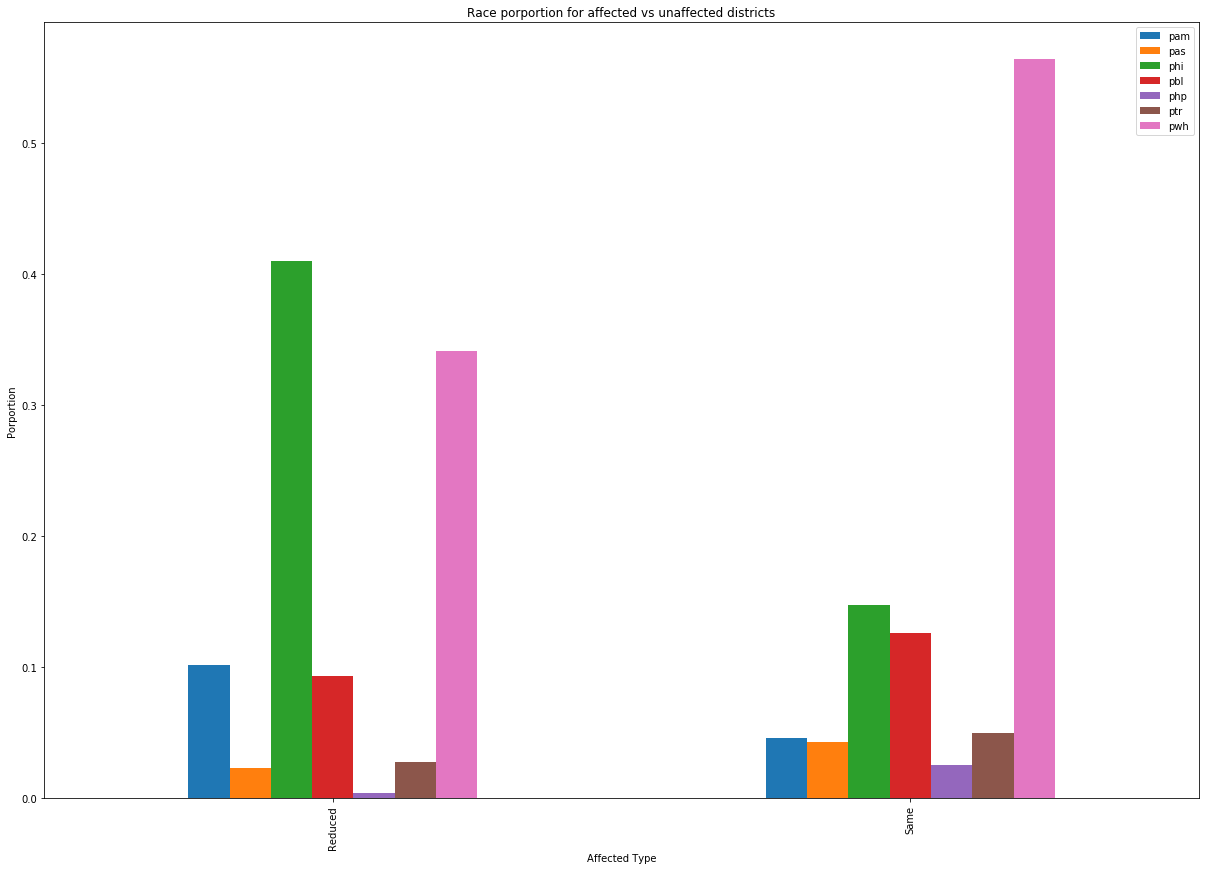

In [139]:
a=g.plot.bar()
plt.title('Race porportion for affected vs unaffected districts')
plt.ylabel('Porportion')
plt.xlabel('Affected Type')
plt.savefig('HW4_problem2.png')

Ideally we would like to see the same race porportion distribution between districts that had their budgets reduced and those districts that did not have their budgets reduced. The reason we would like these two distributions to be the same is to ensure that district budgets aren't affected by an underlying racial bias. Unfortunately, the way in which I decided to create budget cuts did not ensure that racial distributions were the same between the two different types of districts.


# Problem 3

In [158]:
demo=pd.read_csv('ccd_lea_052_1516_w_1a_011717.csv',low_memory=False)
disable=pd.read_csv('ccd_lea_002089_1516_w_1a_011717.csv')

In [177]:
new_df=pd.merge(disable,demo)
new_df.dropna()

,SURVYEAR,FIPST,STABR,STATENAME,SEANAME,LEAID,ST_LEAID,LEA_NAME,SPECED,PK,...,BLALF,WH,WHALM,WHALF,HP,HPALM,HPALF,TR,TRALM,TRALF
0,2015-2016,1,AL,ALABAMA,Alabama Department Of Education,100002,210,Alabama Youth Services,24,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,2015-2016,1,AL,ALABAMA,Alabama Department Of Education,100005,101,Albertville City,267,118,...,68,2619,1310,1309,4,0,4,119,66,53
2,2015-2016,1,AL,ALABAMA,Alabama Department Of Education,100006,048,Marshall County,430,154,...,24,4331,2228,2103,2,1,1,49,28,21
3,2015-2016,1,AL,ALABAMA,Alabama Department Of Education,100007,158,Hoover City,861,65,...,1724,8131,4230,3901,14,5,9,275,140,135
4,2015-2016,1,AL,ALABAMA,Alabama Department Of Education,100008,169,Madison City,735,156,...,959,6186,3187,2999,27,14,13,393,182,211
5,2015-2016,1,AL,ALABAMA,Alabama Department Of Education,100009,600,Al Inst Deaf And Blind,280,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
6,2015-2016,1,AL,ALABAMA,Alabama Department Of Education,100011,167,Leeds City,171,67,...,196,1148,572,576,5,5,0,63,36,27
7,2015-2016,1,AL,ALABAMA,Alabama Department Of Education,100012,115,Boaz City,120,75,...,10,1535,771,764,11,6,5,73,40,33
8,2015-2016,1,AL,ALABAMA,Alabama Department Of Education,100013,205,Trussville City,213,0,...,228,3741,1897,1844,0,0,0,67,32,35
9,2015-2016,1,AL,ALABAMA,Alabama Department Of Education,100015,602,SafetyNet Academy,30,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [179]:
new_df=new_df[new_df.TOTAL>0]

In [180]:
new_df['speced_prop']=new_df['SPECED']/new_df['TOTAL']


In [182]:
impacted_leaid=impacted_districts.LEAID.tolist()
list_impacted=list(demo.LEAID.isin(impacted_leaid))
affected=[]
for i in range(len(new_df)):
    if list_impacted[i]==True:
        affected.append('Reduced')
    else:
        affected.append('Same')
new_df['Type']=affected
new_df.LEAID=new_df.LEAID.astype(str)

In [183]:
g=new_df[['speced_prop','Type']].groupby('Type').sum()

In [184]:
new_df

,SURVYEAR,FIPST,STABR,STATENAME,SEANAME,LEAID,ST_LEAID,LEA_NAME,SPECED,PK,...,WHALM,WHALF,HP,HPALM,HPALF,TR,TRALM,TRALF,speced_prop,Type
1,2015-2016,1,AL,ALABAMA,Alabama Department Of Education,100005,101,Albertville City,267,118,...,1310,1309,4,0,4,119,66,53,0.051208,Same
2,2015-2016,1,AL,ALABAMA,Alabama Department Of Education,100006,048,Marshall County,430,154,...,2228,2103,2,1,1,49,28,21,0.076309,Same
3,2015-2016,1,AL,ALABAMA,Alabama Department Of Education,100007,158,Hoover City,861,65,...,4230,3901,14,5,9,275,140,135,0.061898,Same
4,2015-2016,1,AL,ALABAMA,Alabama Department Of Education,100008,169,Madison City,735,156,...,3187,2999,27,14,13,393,182,211,0.073419,Same
6,2015-2016,1,AL,ALABAMA,Alabama Department Of Education,100011,167,Leeds City,171,67,...,572,576,5,5,0,63,36,27,0.089764,Reduced
7,2015-2016,1,AL,ALABAMA,Alabama Department Of Education,100012,115,Boaz City,120,75,...,771,764,11,6,5,73,40,33,0.051948,Same
8,2015-2016,1,AL,ALABAMA,Alabama Department Of Education,100013,205,Trussville City,213,0,...,1897,1844,0,0,0,67,32,35,0.047801,Same
16,2015-2016,1,AL,ALABAMA,Alabama Department Of Education,100030,102,Alexander City,310,50,...,835,774,2,2,0,73,40,33,0.099936,Same
21,2015-2016,1,AL,ALABAMA,Alabama Department Of Education,100060,104,Andalusia City,155,60,...,571,514,0,0,0,36,16,20,0.088825,Same
22,2015-2016,1,AL,ALABAMA,Alabama Department Of Education,100090,105,Anniston City,143,157,...,63,45,0,0,0,35,14,21,0.068128,Same


In [188]:
g['speced_prop']=g['speced_prop']/sum(g['speced_prop'])

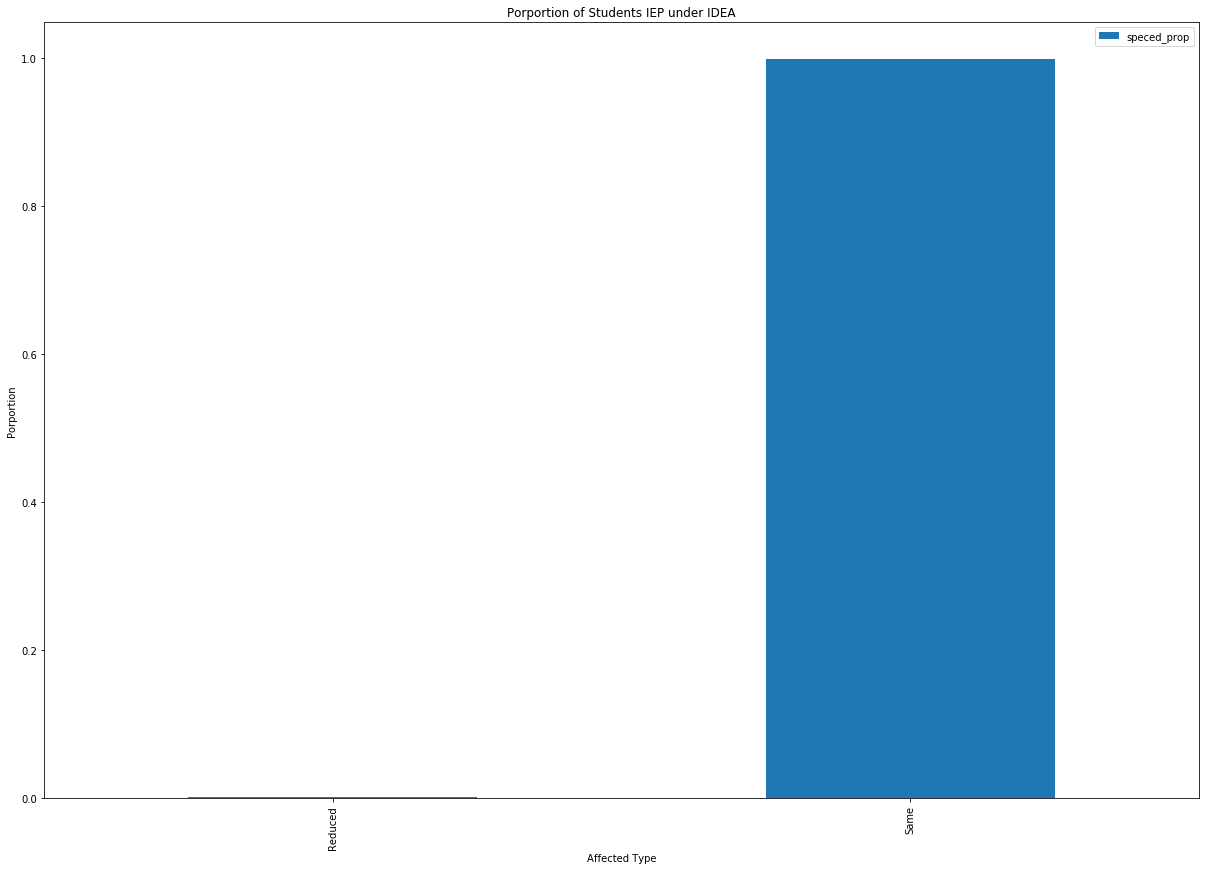

In [191]:
a=g.plot.bar()
plt.title('Porportion of Students IEP under IDEA')
plt.ylabel('Porportion')
plt.xlabel('Affected Type')
plt.savefig('HW4_problem3.png')

Actually, there appears to be very little in terms of Schools with IEP under IDEA students that are affected by the budget reductions. This obviously is biased, but may not be a bad thing in this instance. More funding might be necessary for IEP under IDEA students and thus, not cutting districts with IEP students would be a good thing.